=== EDA BEFORE CLEANING ===
Missing values per column:
 Age                        0
Gender                     0
Temperature (C)            0
Humidity                   0
Wind Speed (km/h)          0
nausea                     0
joint_pain                 0
abdominal_pain             0
high_fever                 0
chills                     0
fatigue                    0
runny_nose                 0
pain_behind_the_eyes       0
dizziness                  0
headache                   0
chest_pain                 0
vomiting                   0
cough                      0
shivering                  0
asthma_history             0
high_cholesterol           0
diabetes                   0
obesity                    0
hiv_aids                   0
nasal_polyps               0
asthma                     0
high_blood_pressure        0
severe_headache            0
weakness                   0
trouble_seeing             0
fever                      0
body_aches                 0
sore_throat     

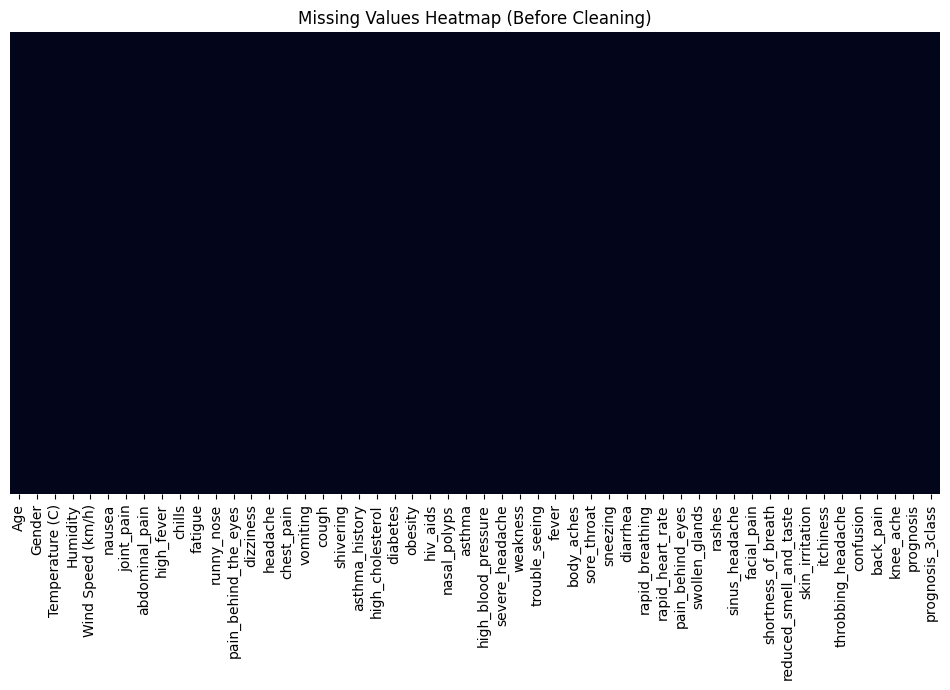

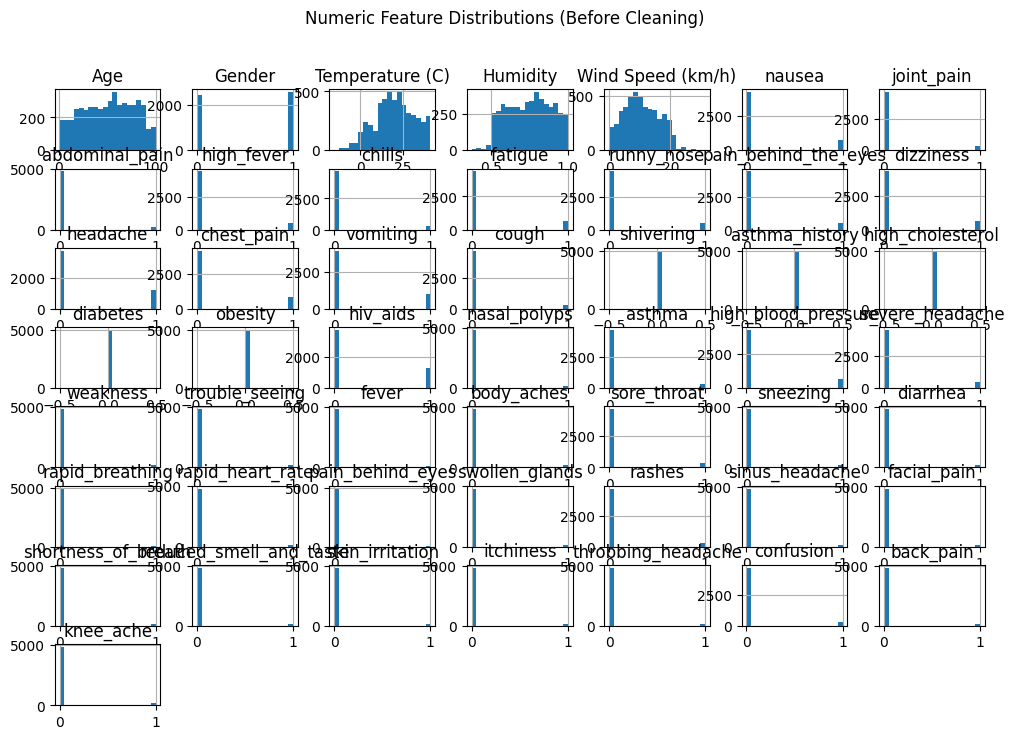

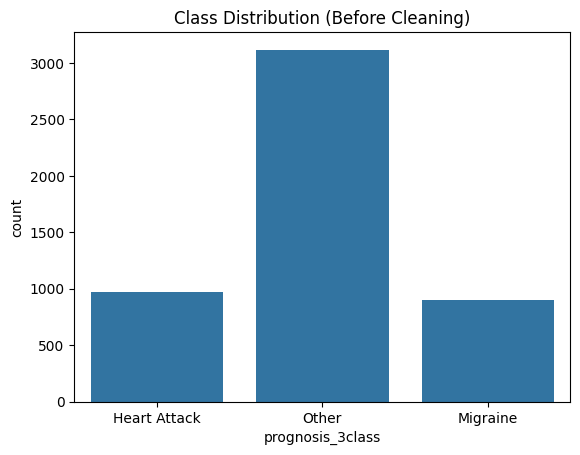

Total missing values: 0
Continuous: ['Age', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)']
Binary candidates (will enforce 0/1): ['Gender', 'nausea', 'joint_pain', 'abdominal_pain', 'high_fever', 'chills', 'fatigue', 'runny_nose', 'pain_behind_the_eyes', 'dizziness']  ... total: 46
Rows, Cols: (4981, 52)

Class counts (prognosis_3class):
prognosis_3class
Other           3116
Heart Attack     968
Migraine         897
Name: count, dtype: int64

Rows with ALL symptoms == 0: 326

=== EDA AFTER CLEANING ===


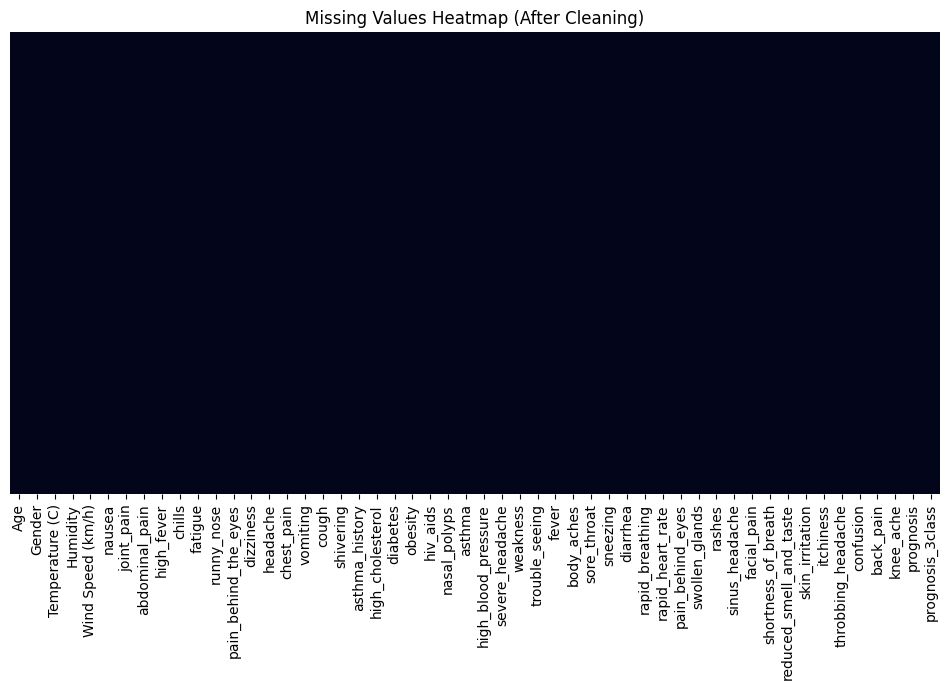

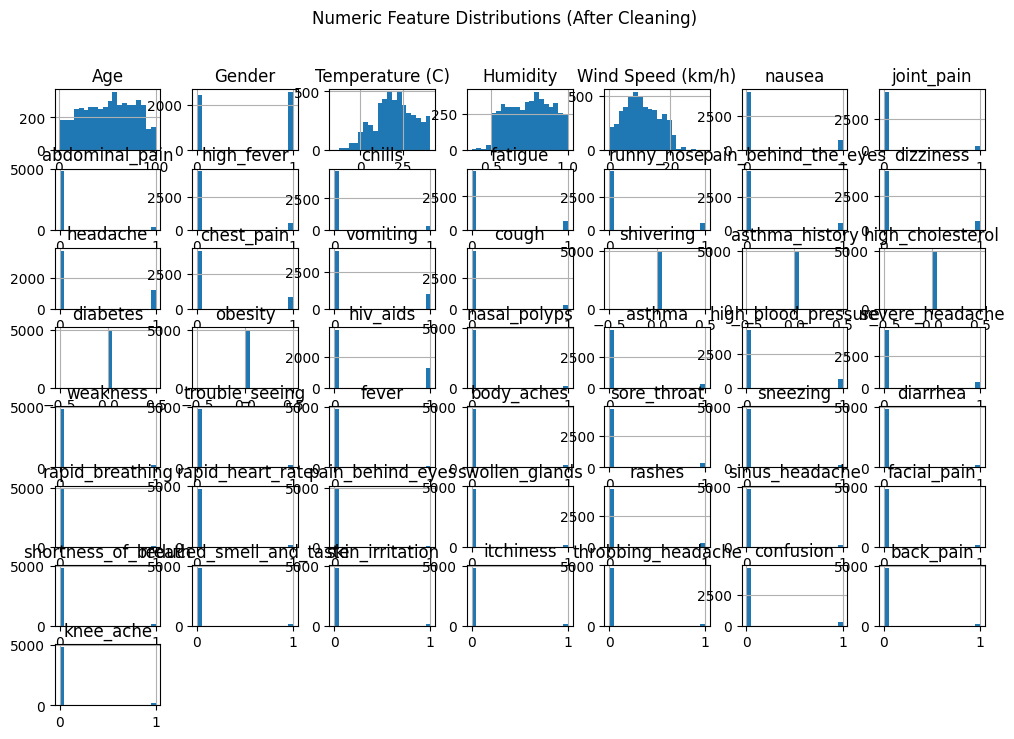

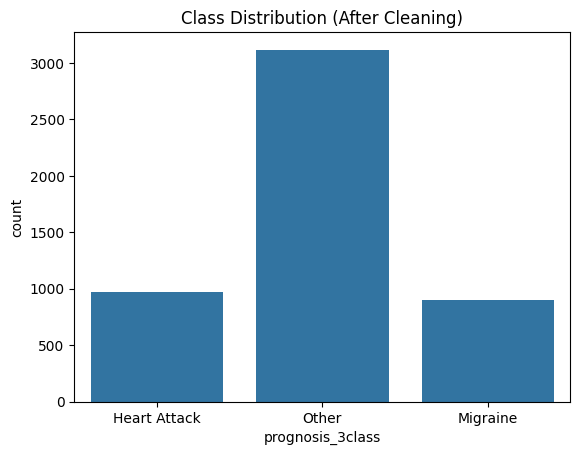

Saved: weather_disease_cleaned-1.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show all columns when displaying a DataFrame
pd.set_option("display.max_columns", None)

# Load dataset
df = pd.read_csv("weather_disease_cleaned-1.csv")

# --- EDA: Before handling missing values ---
print("=== EDA BEFORE CLEANING ===")
print("Missing values per column:\n", df.isna().sum())

# Visualize missing values heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap (Before Cleaning)")
plt.show()

# Visualize distribution of numeric features
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_cols].hist(bins=20, figsize=(12,8))
plt.suptitle("Numeric Feature Distributions (Before Cleaning)")
plt.show()

# Visualize class balance
if "prognosis_3class" in df.columns:
    sns.countplot(x="prognosis_3class", data=df)
    plt.title("Class Distribution (Before Cleaning)")
    plt.show()


# --- Handle missing values ---
missing_total = df.isna().sum().sum()
print("Total missing values:", missing_total)

# Identify continuous & binary columns
continuous_cols = [c for c in ["Age", "Temperature (C)", "Humidity", "Wind Speed (km/h)"] if c in df.columns]

targets = {"prognosis", "prognosis_3class"}
num_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
binary_candidates = [c for c in num_cols if c not in set(continuous_cols) | targets]

print("Continuous:", continuous_cols)
print("Binary candidates (will enforce 0/1):", binary_candidates[:10], " ... total:", len(binary_candidates))

# Basic sanity checks
print("Rows, Cols:", df.shape)
print("\nClass counts (prognosis_3class):")
print(df["prognosis_3class"].value_counts())

symptom_cols = [c for c in binary_candidates if c.lower() not in {"gender"}]
zero_rows = (df[symptom_cols].sum(axis=1) == 0).sum()
print(f"\nRows with ALL symptoms == 0: {zero_rows}")

# --- EDA: After handling missing values ---
print("\n=== EDA AFTER CLEANING ===")
# Example: drop or fill missing values (depends on your method)
df_cleaned = df.fillna(0)  # simple example

# Missing values heatmap after cleaning
plt.figure(figsize=(12,6))
sns.heatmap(df_cleaned.isna(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap (After Cleaning)")
plt.show()

# Numeric distributions after cleaning
df_cleaned[numeric_cols].hist(bins=20, figsize=(12,8))
plt.suptitle("Numeric Feature Distributions (After Cleaning)")
plt.show()

# Class balance after cleaning
if "prognosis_3class" in df_cleaned.columns:
    sns.countplot(x="prognosis_3class", data=df_cleaned)
    plt.title("Class Distribution (After Cleaning)")
    plt.show()

# Save cleaned data
clean_csv = "weather_disease_cleaned-1.csv"
df_cleaned.to_csv(clean_csv, index=False)
print(f"Saved: {clean_csv}")